## Parametrisierung der Dichtekurve
Anhand von 3 Punkten:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pexl.utils.targets import parameters, target, Zielwert, Bezug

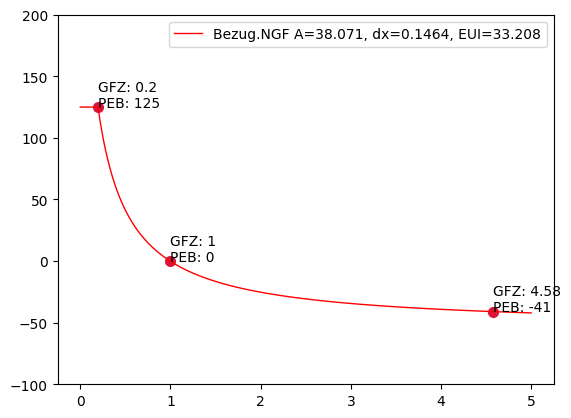

In [2]:
# NGF Punkte
p1 = (0.2, 125) # NGF
p2 = (1, 0)
p3 = (4.58, -41)
points = [p1, p2, p3]

A, dx, EUI, fPE  = parameters(p1, p2, p3)

GFZ = np.linspace(0.0, 5, 500) #min, max, steps

zw = Zielwert.from_points(points, decimals=2, cutoff=125, bezug=Bezug.NGF)
df = pd.DataFrame({
    f"{zw.bezug} {A=:.3f}, {dx=:.4f}, {EUI=:.3f}": zw.alpha(GFZ),},
     index=GFZ)

ax = df.plot(linewidth=1, color="red")
ax.set_ylim(-100,200)

ax.scatter(*zip(*points), marker="o", color="crimson", linewidth=2);
for x, y in points:
    ax.annotate(f"GFZ: {x}\nPEB: {y}", (x, y))



zq_test = Zielwert(A=38, dx=0.15, EUI=33, cutoff=125, bezug=Bezug.NGF)

### NGF  Betrachtung

In [4]:
zq_neu = Zielwert.ZQSynergy()

teststellen = np.array([0.2, 0.75, 3, 4.58])
(zq_test.alpha(teststellen) == zq_neu.alpha(teststellen))

points = [(x, round(zq_neu.alpha(x),2)) for x in teststellen]

ax = zq_neu.df(GFZ).plot(linewidth=1, color="red")

a = [*zip(*points)]
ax.scatter(*a, marker="|", color="crimson", linewidth=1);
for x, y in points:
    ax.annotate(f"GFZ: {x}\nPEB: {y}", (x, y), )

zq_df = pd.DataFrame({
    "ZQ1 (auf NGF)": Zielwert.ZQ1().alpha(GFZ),
    "Vorschlag Oktober (NGF)": Zielwert.ZQSynergyOktober().alpha_zielwert_ngf(GFZ),
    # "Vorschlag Oktober (BGF)": Zielwert.ZQSynergyOktober().alpha_zielwert_bgf(GFZ)
}, index=GFZ)

from pexl.utils.plotting import target_of_gfz
target_of_gfz(ax, zq_df, no_legend=False, linestyle="dashed", linewidth=0.8, xlims=(GFZ[0], GFZ[-1]))
ax.set_ylabel("PEB $[kWh/m_{NGF}²]$")
plt.title(zq_neu.name+" Alpha Zielwert (NGF)")
plt.savefig("kurve_letztstand_NGF.png", dpi=300)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### BGF Betrachtung

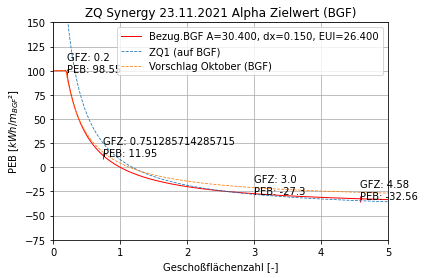

In [ ]:
zq_neu = Zielwert.ZQSynergy()
zq_neu.set_reference(bezug=Bezug.BGF)
teststellen = np.array([0.2, 0.75, 3, 4.58])
(zq_test.alpha(teststellen) == zq_neu.alpha(teststellen))

points = [(x, round(zq_neu.alpha(x),2)) for x in teststellen]

ax = zq_neu.df(GFZ).plot(linewidth=1, color="red")

a = [*zip(*points)]
ax.scatter(*a, marker="|", color="crimson", linewidth=1);
for x, y in points:
    ax.annotate(f"GFZ: {x}\nPEB: {y}", (x, y), )

zqokt = Zielwert.ZQSynergyOktober()
zqokt.set_reference(bezug=Bezug.BGF)
zqokt.cutoff=100
zq_df = pd.DataFrame({
    "ZQ1 (auf BGF)": Zielwert.ZQ1(bezug=Bezug.BGF).alpha(GFZ),
    # "Vorschlag Oktober (NGF)": Zielwert.ZQSynergyOktober().alpha_zielwert_ngf(GFZ),
    "Vorschlag Oktober (BGF)": zqokt.alpha_zielwert_bgf(GFZ)
}, index=GFZ)

from utils.plotting import target_of_gfz
target_of_gfz(ax, zq_df, no_legend=False, linestyle="dashed", linewidth=0.8, xlims=(GFZ[0], GFZ[-1]))
ax.set_ylabel("PEB $[kWh/m_{BGF}²]$")
plt.title(zq_neu.name+" Alpha Zielwert (BGF)")
plt.savefig("kurve_letztstand_BGF.png", dpi=300)